### La régression polynomiale ne marche pas là. Je n'ai pas trouvé le problème
##### Car pour la descente de gradient la sommes des erreurs mise au carré peut provoquer des erreurs. Ainsi que les données sont trop volatiles.

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
from random import randint as ran
#Pour avoir l'auto complétion:
%config IPCompleter.greedy=True  

In [2]:
#Permet de construire notre modèle
def model(X, theta):
    return X.dot(theta)

In [3]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        print(theta)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
    print(cost_history)
    return theta, cost_history

In [4]:
#Retourne le gradient au point X
def grad(X, y, theta):
    m = len(y)
    return (1/m * X.T.dot(model(X, theta) - y))

In [5]:
#Fonction qui calcule le coefficient de détermination
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [6]:
#notre belle fonction coût
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [7]:
data=pd.read_csv('preprocessed_CAC40.csv',index_col='Date',parse_dates=True)
data=data.drop(['Open','Closing_Price','Volume'], axis=1)
data=data[data['Name'] == 'SAFRAN']
data=data.dropna(axis=0)
y=data['Daily_High'].to_numpy()
x=np.ones(y.shape)

for i in range(len(data)):
    x[i]=i
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

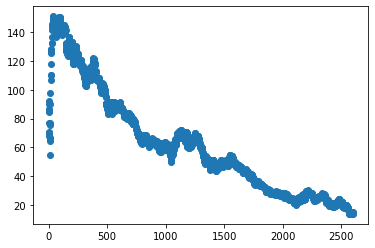

In [8]:
plt.scatter(x, y)

In [9]:
X = np.hstack((x**5,x**4,x**3,x**2,x, np.ones(x.shape)))#régression polynomiale
print(X.shape)  #C'est juste que l'on créer le vecteur X de taille m*(n+1)

(2600, 6)


### Résultat

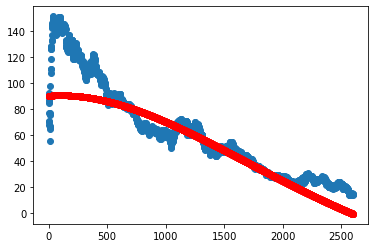

In [10]:
#Je rentre le theta que j'ai obtenu lors d'un long essai
#Donc l'image obtenu est donc le résultat final
theta=np.array([[-1.1e-16],[-0.000000000000008],[0.000000008],[-0.000035],[0.0071],[90.0]])
#theta=np.array([[0.000000008],[-0.000035],[0.0071],[90.0]])
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

In [11]:
cost_function(X, y, theta)

150.9718208952082

In [12]:
#L'entrainement se fait ici
n_iterations = 100
learning_rate = 1e-3

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
#Theta est afficher à chaque itération.

[[2.14254767e+14]
 [8.96001675e+10]
 [3.75378362e+07]
 [1.58133169e+04]
 [7.36975880e+00]
 [9.00081334e+01]]
[[-2.74379893e+44]
 [-1.16106143e+41]
 [-4.96275594e+37]
 [-2.14775957e+34]
 [-9.44251812e+30]
 [-4.23784267e+27]]
[[3.51377600e+74]
 [1.48688366e+71]
 [6.35542660e+67]
 [2.75047342e+64]
 [1.20923196e+61]
 [5.42708494e+57]]
[[-4.49982746e+104]
 [-1.90413957e+101]
 [-8.13891470e+097]
 [-3.52232351e+094]
 [-1.54857201e+091]
 [-6.95005767e+087]]
[[5.76258907e+134]
 [2.43848770e+131]
 [1.04228932e+128]
 [4.51077361e+124]
 [1.98313918e+121]
 [8.90041379e+117]]
[[-7.37971246e+164]
 [-3.12278697e+161]
 [-1.33478118e+158]
 [-5.77660698e+154]
 [-2.53965653e+151]
 [-1.13980875e+148]]
[[9.45064021e+194]
 [3.99911734e+191]
 [1.70935342e+188]
 [7.39766414e+184]
 [3.25234625e+181]
 [1.45966696e+178]]
[[-1.21027209e+225]
 [-5.12136745e+221]
 [-2.18903979e+218]
 [-9.47362958e+214]
 [-4.16503413e+211]
 [-1.86928520e+208]]
[[1.54990404e+255]
 [6.55854838e+251]
 [2.80333787e+248]
 [1.21321617e+245

<ipython-input-6-2acadbd1fb63>:4: RuntimeWarning: overflow encountered in square
  return 1/(2*m) * np.sum((model(X, theta) - y)**2)


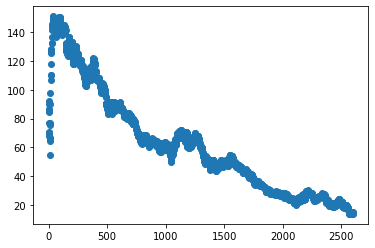

In [13]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

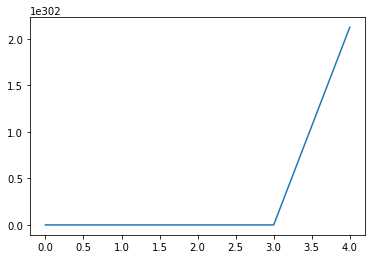

In [14]:
#Permet de voir l'apprentisage du modèle dans le temps
plt.plot(range(n_iterations), cost_history)

In [15]:
coef_determination(y, predictions)

nan